<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2024/blob/master/08_scipy_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 8 - Statistics in Python (Second part)

sources:

https://medium.com/insights-school/learn-basic-statistics-with-python-cc0f45275929

https://scipy-lectures.org/intro/scipy.html#scipy


In [1]:
import math
import statistics
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


## Pearson Correlation
We can  compute Pearson correlation coefficient using SciPy’s stats module. SciPy’s stats module has a function called pearsonr() that can take two arrays and return a tuple containing Pearson correlation coefficient and the significance of the correlation as p-value.


In [3]:
#The first element of tuple is the Pearson correlation and the second is p-value.
stats.pearsonr(data['FSIQ'],data['VIQ'])


PearsonRResult(statistic=0.9466387777452879, pvalue=2.78912958724651e-20)

In [4]:
# we can also use pandas
data['FSIQ'].corr(data['VIQ'], method="pearson")


0.9466387777452884

## Spearman Correlation
Pearson correlation assumes that the data we are comparing is normally distributed. When that assumption is not true, the correlation value is not reflecting the true association. Spearman correlation does not assume that data is from a specific distribution, so it is a non-parametric correlation measure. Spearman correlation is also known as Spearman’s rank correlation as it computes correlation coefficient on rank values of the data. Using SciPy, we can compute Spearman correlation using the function spearmanr().

In [5]:
#The first element of tuple is the Spearman's rank correlation and the second is p-value.
stats.spearmanr(data['FSIQ'],data['VIQ'])

SignificanceResult(statistic=0.9180538517127924, pvalue=7.511345723342308e-17)

In [6]:
# we can also use pandas
data['FSIQ'].corr(data['VIQ'], method="spearman")


0.9180538517127924

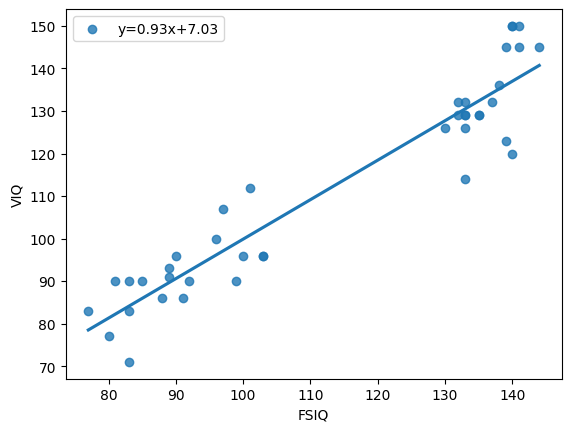

In [7]:
slope, intercept, r_value, pv, se = stats.linregress(data['FSIQ'],data['VIQ'])
sns.regplot(x="FSIQ", y="VIQ", data=data,
      ci=None, label="y={0:.2f}x+{1:.2f}".format(slope, intercept)).legend(loc="best")

## Student’s t-test: the simplest statistical test
### 1-sample t-test: testing the value of a population mean
scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value:

<ipython-input-8-ee5ba66b8c1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['VIQ'],hist=False)


30.08809997084933


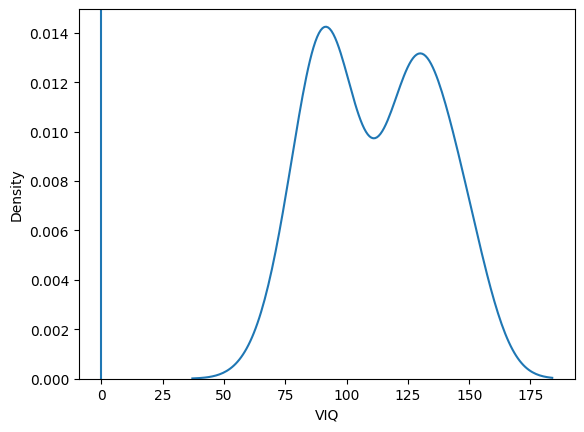

In [8]:
sns.distplot(data['VIQ'],hist=False)
plt.axvline(0)
res=stats.ttest_1samp(data['VIQ'], 0)
print (res[0])



## 2-sample t-test: testing for difference across populations
We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [9]:

female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)



TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

<ipython-input-10-d1a54acd9eaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_viq,hist=False,color='purple')
<ipython-input-10-d1a54acd9eaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_viq,hist=False,color='blue')


<Axes: xlabel='VIQ', ylabel='Density'>

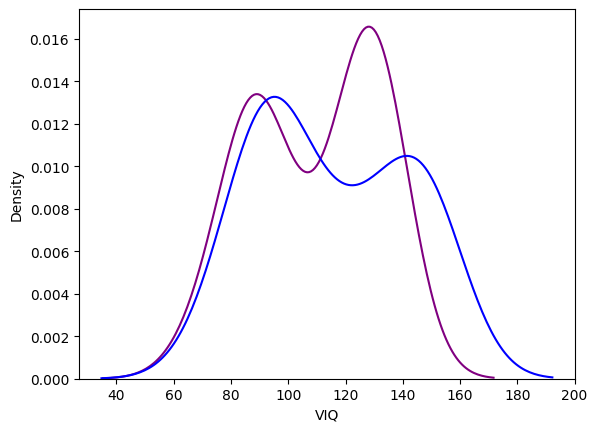

In [10]:
sns.distplot(female_viq,hist=False,color='purple')
sns.distplot(male_viq,hist=False,color='blue')


## Paired tests: repeated measurements on the same individuals
PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

<ipython-input-11-7ba8102dc8c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['FSIQ'],color='r')
<ipython-input-11-7ba8102dc8c5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PIQ'],color='g')


<Axes: xlabel='PIQ', ylabel='Density'>

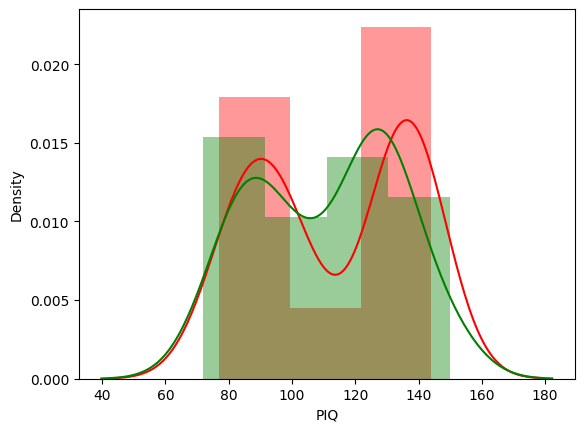

In [11]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])
sns.distplot(data['FSIQ'],color='r')
sns.distplot(data['PIQ'],color='g')

# try to use groupby to run a two-sample t-test

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [12]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

This is equivalent to a 1-sample test on the difference:

<ipython-input-13-0674b7f0f3b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['FSIQ'] - data['PIQ'])


TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

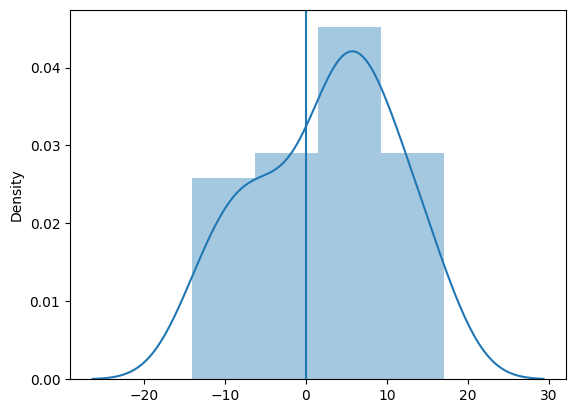

In [13]:
sns.distplot(data['FSIQ'] - data['PIQ'])
plt.axvline(0)
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)


T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption. Note The corresponding test in the non paired case is the Mann–Whitney U test, scipy.stats.mannwhitneyu().

In [14]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

### Exercise

Test the difference between weights in males and females.
Use non parametric statistics to test the difference between VIQ in males and females.
Conclusion: we find that the data does not support the hypothesis that males and females have different VIQ.

# Linear models, multiple factors, and analysis of variance
Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:

> y = ax + b + e

where e is observation noise. We will use the statsmodels module to:

Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
Test that coef is non zero.

In [15]:
x = np.linspace(-5, 5, 20)
x2= np.linspace(0,10, 20)
x3=  np.random.normal(size=20)

np.random.seed(1)
# normal distributed noise
y = -5 + 3*x -10*x2 + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x,'x2': x2, 'x3':x3, 'y': y})

In [16]:
data

,x,x2,x3,y
0,-5.000000,0.000000,0.439405,-13.502619
1,-4.473684,0.526316,0.215790,-26.131236
2,-3.947368,1.052632,1.372640,-29.481108
3,-3.421053,1.578947,2.296791,-35.344506
4,-2.894737,2.105263,-1.405669,-31.275212
5,-2.368421,2.631579,0.230429,-47.627207
6,-1.842105,3.157895,0.326071,-35.126016
7,-1.315789,3.684211,0.040945,-48.834301
8,-0.789474,4.210526,1.593660,-48.197528
9,-0.263158,4.736842,1.229309,-54.155376


In [17]:
from statsmodels.formula.api import ols
model = ols("y ~ x + x2 + x3", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     202.2
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.41e-12
Time:                        14:43:03   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             122.0
Df Residuals:                      17   BIC:                             125.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8067      0.109    -25.790      0.0

## Categorical variables:
 comparing groups or multiple categories


In [18]:
data = pd.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.445
Time:                        14:43:03   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.


## Link to t-tests between different FSIQ and PIQ

To compare different types of IQ, we need to create a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable:

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


<Axes: xlabel='type', ylabel='iq'>

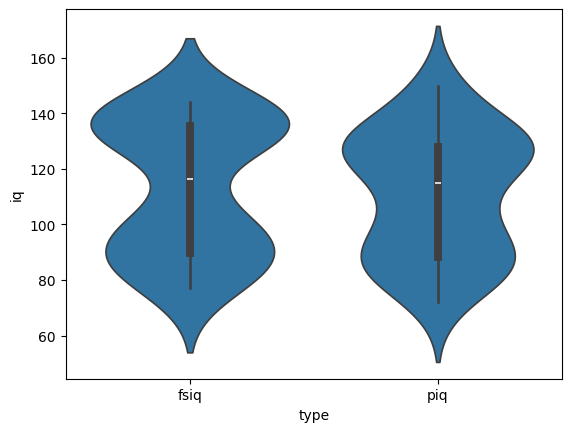

In [19]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)

#sns.boxplot(data=data_long,x='type',y='iq')
sns.violinplot(data=data_long,x='type',y='iq')



In [20]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.643
Time:                        14:43:06   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

## Multiple Regression:
including multiple factors

In [21]:
data = pd.read_csv('https://scipy-lectures.org/_downloads/iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.58e-20
Time:                        14:43:06   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

# Analysis of variance (ANOVA)
In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a vector of ‘contrast’ on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test.

In [22]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.07369058781701142, df_denom=146, df_num=1>
